In [ ]:
!pip install kaggle
import os
import pandas as pd
import numpy as np
!mkdir -p ~/.kaggle
api_credentials = '''{"username":"anu1981","key":"3dfc74417134a956b0034476ea41dd1e"}'''
with open('/root/.kaggle/kaggle.json', 'w') as f:
    f.write(api_credentials)
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mczielinski/bitcoin-historical-data -p /content/bitcoin_data --unzip
print("Contents of download directory:")
!ls -R /content/bitcoin_data
import glob
csv_files = glob.glob("/content/bitcoin_data/**/*.csv", recursive=True)
print("\nFound CSV files:")
for file in csv_files:
    print(file)
    bitcoin_data = pd.read_csv(csv_files[0])
    print("\nFirst few rows of the data:")
    print(bitcoin_data.head())

Dataset URL: https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
License(s): CC-BY-SA-4.0
 90% 81.0M/89.7M [00:00<00:00, 138MB/s]
100% 89.7M/89.7M [00:00<00:00, 134MB/s]
Contents of download directory:
/content/bitcoin_data:
btcusd_1-min_data.csv

Found CSV files:
/content/bitcoin_data/btcusd_1-min_data.csv

First few rows of the data:
      Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0


UNDERSTANDING DATA

In [ ]:
bitcoin_data.shape

(6743281, 6)

In [ ]:
bitcoin_data.dtypes

,0
Timestamp,float64
Open,float64
High,float64
Low,float64
Close,float64
Volume,float64


In [ ]:
bitcoin_data.head(20)

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0
5,1.325412e+09,4.58,4.58,4.58,4.58,0.0
6,1.325412e+09,4.58,4.58,4.58,4.58,0.0
7,1.325412e+09,4.58,4.58,4.58,4.58,0.0
8,1.325413e+09,4.58,4.58,4.58,4.58,0.0
9,1.325413e+09,4.58,4.58,4.58,4.58,0.0


In [ ]:
bitcoin_data.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.743280e+06,6.743281e+06,6.743281e+06,6.743281e+06,6.743281e+06,6.743281e+06
mean,1.527763e+09,1.463244e+04,1.463873e+04,1.462597e+04,1.463247e+04,5.460635e+00
std,1.168632e+08,1.984296e+04,1.985051e+04,1.983529e+04,1.984305e+04,2.293113e+01
min,1.325412e+09,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.426572e+09,4.134800e+02,4.136500e+02,4.132200e+02,4.134600e+02,1.827347e-02
50%,1.527732e+09,6.265360e+03,6.267390e+03,6.263290e+03,6.265540e+03,5.000000e-01
75%,1.628892e+09,2.319600e+04,2.320210e+04,2.319000e+04,2.319637e+04,3.177005e+00
max,1.736726e+09,1.082930e+05,1.083640e+05,1.082040e+05,1.082760e+05,5.853852e+03


DATA PREPROCESSING

In [ ]:
#missing values
bitcoin_data.isnull().sum()

,0
Timestamp,1
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df=bitcoin_data

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df_daily = df.resample('D', on='Timestamp').mean()
df_monthly = df.resample('ME', on='Timestamp').mean()
df_annual = df.resample('YE-DEC', on='Timestamp').mean()
df_quarterly = df.resample('QE-DEC', on='Timestamp').mean()

HANDLING MISSING VALUES


In [ ]:
df_daily = df_daily.fillna(df_daily.mean())
df_monthly = df_monthly.fillna(df_monthly.mean())
df_annual = df_annual.fillna(df_annual.mean())
df_quarterly = df_quarterly.fillna(df_quarterly.mean())

FEATURING ENGINEERING

In [ ]:
df_daily['Price_Pct_Change'] = df_daily['Close'].pct_change()
df_monthly['Moving_Average_3M'] = df_monthly['Close'].rolling(window=3).mean()
df_monthly['Moving_Average_6M'] = df_monthly['Close'].rolling(window=6).mean()
df_annual['Moving_Average_12M'] = df_annual['Close'].rolling(window=12).mean()
df_quarterly['Rolling_Std_3M'] = df_quarterly['Close'].rolling(window=3).std()
df_quarterly['Rolling_Std_6M'] = df_quarterly['Close'].rolling(window=6).std()

In [ ]:
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


EXPLORATORY DATA ANALYSIS

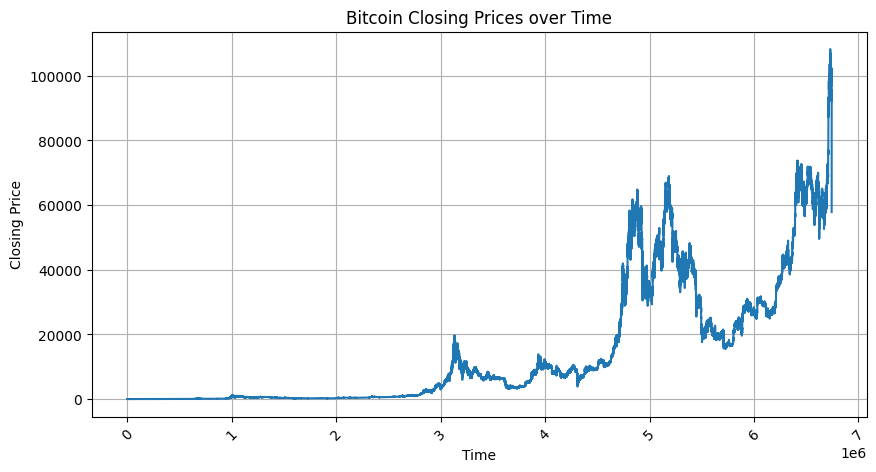

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'])
plt.title('Bitcoin Closing Prices over Time')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


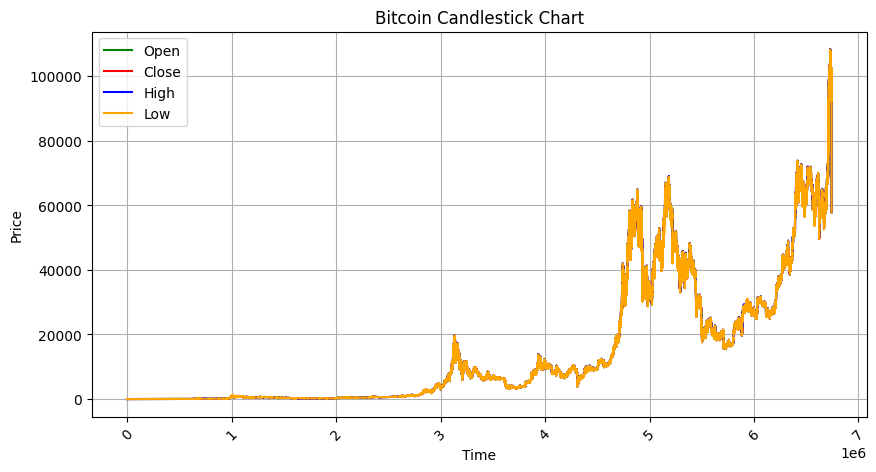

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Open'], color='green', label='Open')
plt.plot(df.index, df['Close'], color='red', label='Close')
plt.plot(df.index, df['High'], color='blue', label='High')
plt.plot(df.index, df['Low'], color='orange', label='Low')
plt.title('Bitcoin Candlestick Chart')
plt.xlabel('Time')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

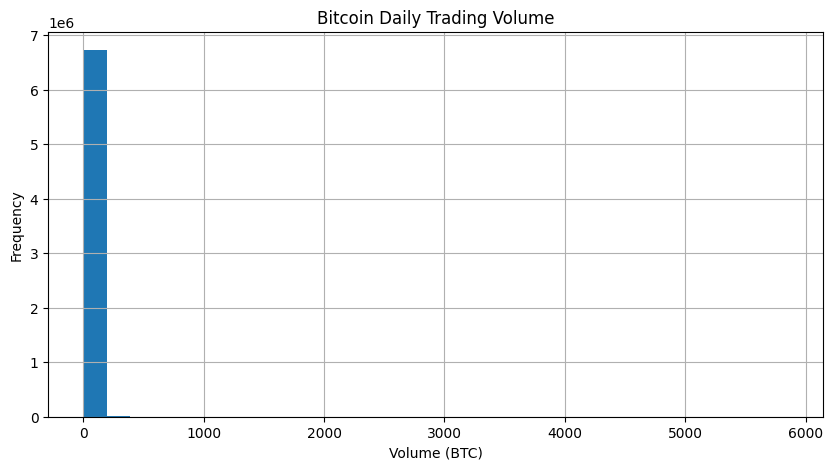

In [ ]:
plt.figure(figsize=(10, 5))
plt.hist(df['Volume'], bins=30)
plt.title('Bitcoin Daily Trading Volume')
plt.xlabel('Volume (BTC)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

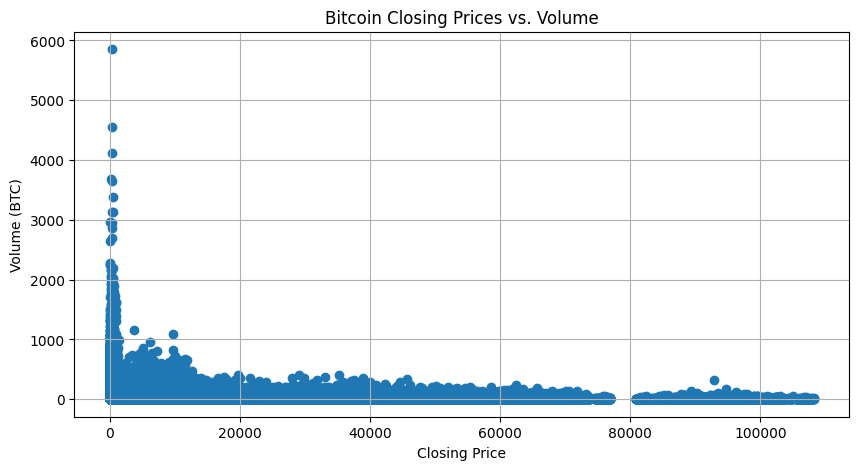

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Close'], df['Volume'])
plt.title('Bitcoin Closing Prices vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume (BTC)')
plt.grid(True)
plt.show()

MODEL SELECTION

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_size = int(len(df_daily) * 0.8)
bitcoin_train_data, bitcoin_test_data = df_daily[:train_size], df_daily[train_size:]

In [ ]:
scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(bitcoin_train_data[['Close']])
scaled_test_data = scaler.transform(bitcoin_test_data[['Close']])

In [ ]:
arima_model = ARIMA(bitcoin_train_data['Close'], order=(1, 1, 1))
arima_model_fit = arima_model.fit()
arima_predictions = arima_model_fit.predict(start=len(bitcoin_train_data), end=len(bitcoin_train_data) + len(bitcoin_test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
sarima_model = SARIMAX(bitcoin_train_data['Close'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))
sarima_model_fit = sarima_model.fit()
sarima_predictions = sarima_model_fit.predict(start=len(bitcoin_train_data), end=len(bitcoin_train_data) + len(bitcoin_test_data) - 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, input_shape=(1, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(np.expand_dims(scaled_train_data, axis=-1),
                              np.expand_dims(scaled_train_data, axis=-1),
                              epochs=10, batch_size=1, verbose=0)
lstm_predictions = lstm_model.predict(np.expand_dims(scaled_test_data, axis=-1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
gbr_model = GradientBoostingRegressor()
gbr_model.fit(np.arange(len(bitcoin_train_data)).reshape(-1, 1), bitcoin_train_data['Close'])
gbr_predictions = gbr_model.predict(np.arange(len(bitcoin_train_data), len(bitcoin_train_data) + len(bitcoin_test_data)).reshape(-1, 1))

In [ ]:
arima_rmse = np.sqrt(mean_squared_error(bitcoin_test_data['Close'], arima_predictions))
sarima_rmse = np.sqrt(mean_squared_error(bitcoin_test_data['Close'], sarima_predictions))
lstm_rmse = np.sqrt(mean_squared_error(bitcoin_test_data['Close'], lstm_predictions))
gbr_rmse = np.sqrt(mean_squared_error(bitcoin_test_data['Close'], gbr_predictions))
print(f"ARIMA RMSE: {arima_rmse}")
print(f"SARIMA RMSE: {sarima_rmse}")
print(f"LSTM RMSE: {lstm_rmse}")
print(f"Gradient Boosting Regressor RMSE: {gbr_rmse}")

ARIMA RMSE: 26081.497224308405
SARIMA RMSE: 22751.586324856115
LSTM RMSE: 47952.13176569475
Gradient Boosting Regressor RMSE: 25836.44806123163


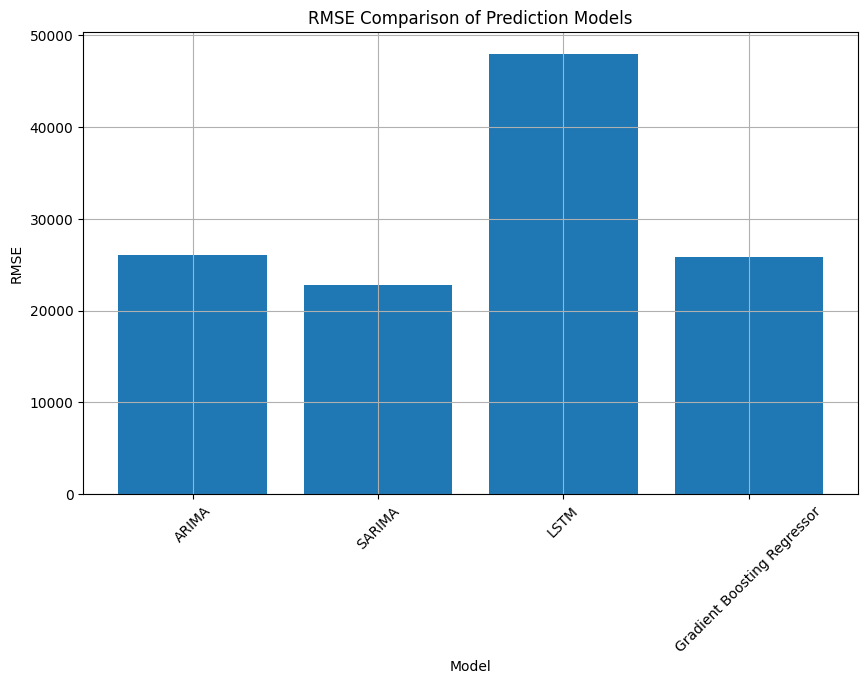

In [ ]:
models = ['ARIMA', 'SARIMA', 'LSTM', 'Gradient Boosting Regressor']
rmse_values = [arima_rmse, sarima_rmse, lstm_rmse, gbr_rmse]
plt.figure(figsize=(10, 6))
plt.bar(models, rmse_values)
plt.title('RMSE Comparison of Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
